In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [43]:
from pathlib import Path

In [6]:
train_data.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [5]:
base_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

train_path = os.path.join(base_folder, 'data/playground-series-s4e8/train.csv')
test_path = os.path.join(base_folder, 'data/playground-series-s4e8/test.csv')

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path) 

## EDA

In [45]:
train_df = train_data.copy()
test_df = test_data.copy()

In [46]:
drop_cols = []
for cols in train_df:
    if train_df[cols].isna().sum() >= len(train_df) * 0.1:
        drop_cols.append(cols)
drop_cols

['cap-surface',
 'gill-attachment',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

In [47]:
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

In [48]:
train_df.isna().sum()

id                           0
class                        0
cap-diameter                 4
cap-shape                   40
cap-color                   12
does-bruise-or-bleed         8
gill-color                  57
stem-height                  0
stem-width                   0
stem-color                  38
has-ring                    24
ring-type               128880
habitat                     45
season                       0
dtype: int64

In [49]:
classes = train_df['class']
train_df.drop(['class'], axis=1, inplace=True)
train_df.drop(['id'], axis=1, inplace=True)
test_ids = test_df['id']
test_df.drop(['id'], axis=1, inplace=True)

In [50]:
numerical_cols =[]
categorical_cols = []
for cols in train_df:
    if train_df[cols].dtype != 'O':
        numerical_cols.append(cols)
    else:
        categorical_cols.append(cols)
        
print(numerical_cols)
print(categorical_cols)

['cap-diameter', 'stem-height', 'stem-width']
['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [51]:
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(train_df[categorical_cols])

numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_imputer.fit(train_df[numerical_cols])

SimpleImputer()

In [52]:
train_df[numerical_cols] = numerical_imputer.transform(train_df[numerical_cols])
test_df[numerical_cols] = numerical_imputer.transform(test_df[numerical_cols])

train_df[categorical_cols] = categorical_imputer.transform(train_df[categorical_cols])
test_df[categorical_cols] = categorical_imputer.transform(test_df[categorical_cols])

In [53]:
train_df['cap-area'] = np.pi * (train_df['cap-diameter']/2) ** 2

train_df['stem-volume'] = np.pi * (train_df['stem-width'] / 2) ** 2 * train_df['stem-height']

In [54]:
test_df['cap-area'] = np.pi * (test_df['cap-diameter']/2) ** 2

test_df['stem-volume'] = np.pi * (test_df['stem-width'] / 2) ** 2 * test_df['stem-height']

In [55]:
numerical_cols.extend(['cap-area', 'stem-volume'])

In [56]:
for cols in numerical_cols:
    train_df[cols] = np.log1p(train_df[cols])
    
for cols in numerical_cols:
    test_df[cols] = np.log1p(test_df[cols])

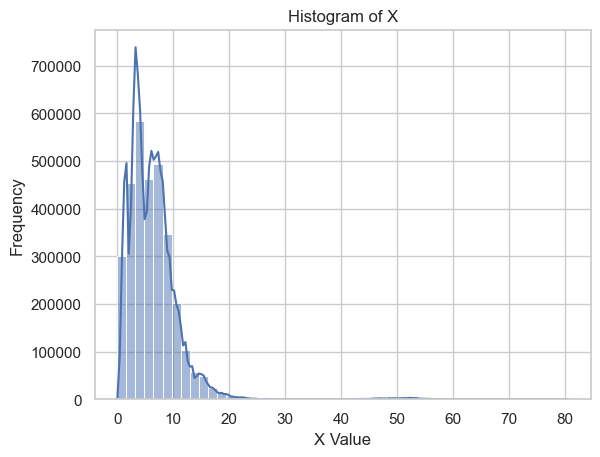

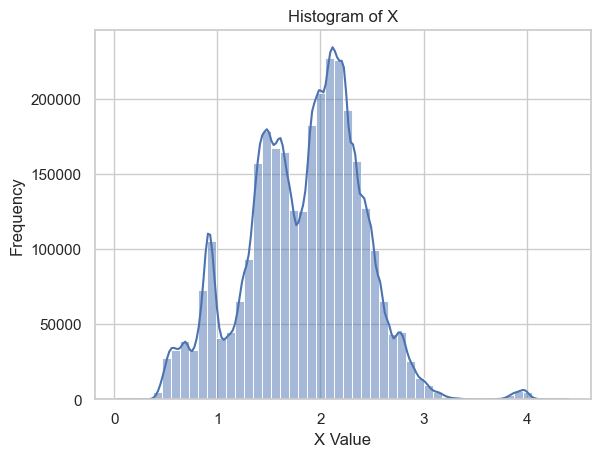

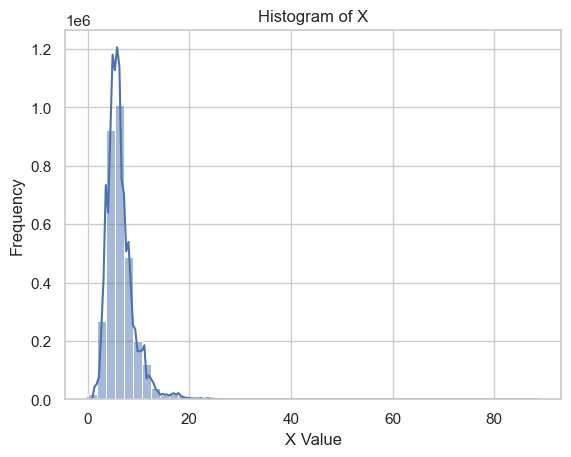

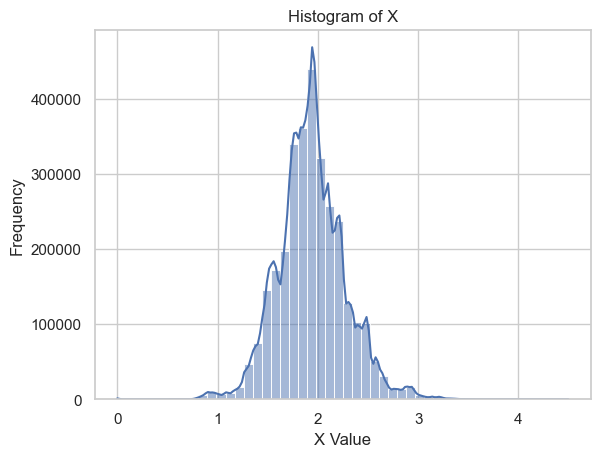

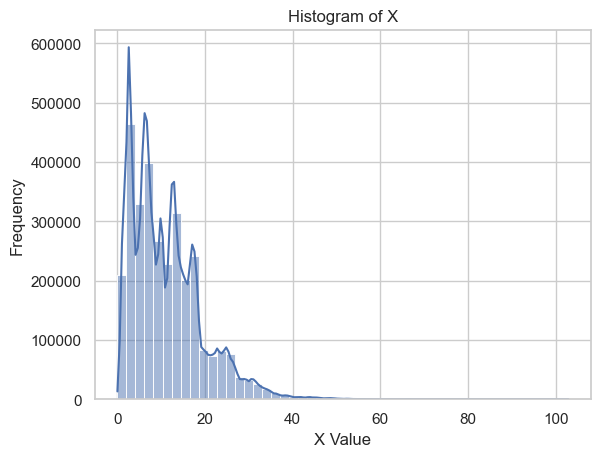

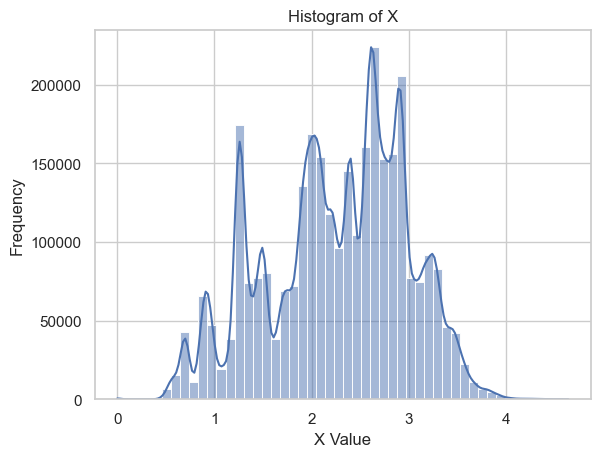

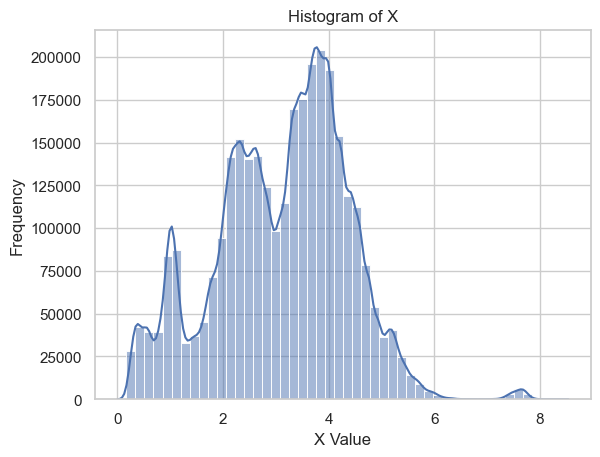

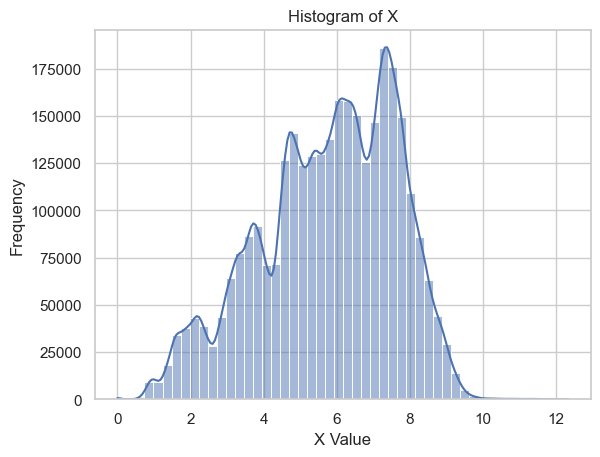

In [57]:
sns.set_theme(style="whitegrid")
sns.histplot(data=train_data, x='cap-diameter', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_df, x='cap-diameter', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_data, x='stem-height', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_df, x='stem-height', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_data, x='stem-width', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_df, x='stem-width', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_df, x='cap-area', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

sns.set_theme(style="whitegrid")
sns.histplot(data=train_df, x='stem-volume', bins=50, kde=True)
plt.xlabel('X Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

In [4]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [3]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_df[categorical_cols] = oe.fit_transform(train_df[categorical_cols])
test_df[categorical_cols] = oe.transform(test_df[categorical_cols])

NameError: name 'train_df' is not defined

In [59]:
categorical_cols

['cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [60]:
le = LabelEncoder()
classes_encoded = le.fit_transform(classes)

## Model

In [61]:
X_train, X_test, y_train, y_test = train_test_split(train_df, classes_encoded, test_size=0.30, random_state=42)

In [62]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
import flaml
from flaml import AutoML

In [26]:
automl = AutoML()

# Define the settings for the automl run
settings = {
    "time_budget": 180,  # Total time in seconds
    "metric": 'accuracy',   # Primary metric for optimization
    "task": 'classification',  # Task type
    "log_file_name": 'flaml_xgboost.log',  # Log file
    "estimator_list": ['xgboost'],  # Only use XGBoost
}

# Train with AutoML
automl.fit(X_train=X_train, y_train=y_train, **settings)

# Predict on test data
y_pred = automl.predict(X_test)

[flaml.automl.logger: 08-11 18:04:34] {1680} INFO - task = classification
[flaml.automl.logger: 08-11 18:04:34] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-11 18:04:35] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 08-11 18:04:35] {1901} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 08-11 18:04:35] {2219} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 08-11 18:04:35] {2345} INFO - Estimated sufficient time budget=50995s. Estimated necessary time budget=51s.
[flaml.automl.logger: 08-11 18:04:35] {2392} INFO -  at 4.2s,	estimator xgboost's best error=0.4151,	best estimator xgboost's best error=0.4151
[flaml.automl.logger: 08-11 18:04:35] {2219} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 08-11 18:04:35] {2392} INFO -  at 4.2s,	estimator xgboost's best error=0.4151,	best estimator xgboost's best error=0.4151
[flaml.automl.logger: 08-11 18:04:35] {2219} INFO - iteration 2,

In [27]:
# Best model found by FLAML
print("Best model:", automl.best_estimator)
print("Best hyperparameters:", automl.best_config)
print("Best loss on validation data:", automl.best_loss)

Best model: xgboost
Best hyperparameters: {'n_estimators': 936, 'max_leaves': 116, 'min_child_weight': np.float64(4.437590285996336), 'learning_rate': np.float64(0.24964403972620555), 'subsample': np.float64(0.8823329539295974), 'colsample_bylevel': np.float64(0.835473445927455), 'colsample_bytree': np.float64(0.707587058577376), 'reg_alpha': np.float64(0.005664534593409382), 'reg_lambda': np.float64(0.013343252707226935)}
Best loss on validation data: 0.017773663079546087


In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [29]:
accuracy

0.9826379234378944

In [30]:
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    423456
           1       0.99      0.98      0.98    511628

    accuracy                           0.98    935084
   macro avg       0.98      0.98      0.98    935084
weighted avg       0.98      0.98      0.98    935084



In [31]:
# accuracy = 0.9832289

In [35]:
params = {'n_estimators': 936, 'max_leaves': 116, 'min_child_weight': np.float64(4.437590285996336), 'learning_rate': np.float64(0.24964403972620555), 'subsample': np.float64(0.8823329539295974), 'colsample_bylevel': np.float64(0.835473445927455), 'colsample_bytree': np.float64(0.707587058577376), 'reg_alpha': np.float64(0.005664534593409382), 'reg_lambda': np.float64(0.013343252707226935)}

In [32]:
from xgboost import XGBClassifier

In [40]:
fr = XGBClassifier(**params)

In [38]:
fr = XGBClassifier()

In [41]:
fr

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=np.float64(0.835473445927455),
              colsample_bynode=None,
              colsample_bytree=np.float64(0.707587058577376), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.24964403972620555), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=116,
              min_child_weight=np.float64(4.437590285996336), missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=936,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [64]:
fr = XGBClassifier(**params)
fr.fit(X_train, y_train)
y_pred = fr.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [66]:
accuracy

0.9824775100418786

In [8]:
ids = test_data['id']

In [9]:
len(ids)

2077964

In [14]:
results = np.random.randint(0,2,len(ids))

In [15]:
len(results)

2077964

In [17]:
pd.DataFrame({'id':ids,
              'class': results})

,id,class
0,3116945,1
1,3116946,1
2,3116947,0
3,3116948,0
4,3116949,1
...,...,...
2077959,5194904,1
2077960,5194905,1
2077961,5194906,0
2077962,5194907,0
